# Data availbaility
To run this notebook, it's mandatory to have a bunch of datasets. The easiest way to get them is to download it [here](https://mega.nz/file/BVAVzCJL#mSWMsOZm1A4SG--ejH7oJf-wE_elskXe9TL-GdBMGIY) (2.91 GB), and extract from the downloaded zip file the folder `data` to the root of the repository (which is **not** the location of this Jupyter notebook).

# Example 3
![example3](doc/pictures/example3.png)

## Preliminaries

In [1]:
import sys
sys.path.append('..')  # Add the parent folder to the sys.path
sys.path.append('../..')  # Add the parent of the parent folder to the sys.path
from pathlib import Path
from neuralhydrology.nh_run import start_run

## Learning process

In [2]:
start_run(config_file=Path("example3.yml", gpu=-1))

2024-02-07 10:53:51,702: Logging to runs\dev\run_0702_105351\output.log initialized.
2024-02-07 10:53:51,703: ### Folder structure created at runs\dev\run_0702_105351
2024-02-07 10:53:51,703: ### Run configurations for run
2024-02-07 10:53:51,704: experiment_name: None
2024-02-07 10:53:51,706: run_dir: runs\dev\run_0702_105351
2024-02-07 10:53:51,707: train_basin_file: 6_basin_list.txt
2024-02-07 10:53:51,708: validation_basin_file: 6_basin_list.txt
2024-02-07 10:53:51,708: test_basin_file: 6_basin_list.txt
2024-02-07 10:53:51,708: train_start_date: 2006-10-01 00:00:00
2024-02-07 10:53:51,708: train_end_date: 2008-09-30 00:00:00
2024-02-07 10:53:51,708: validation_start_date: 2002-10-01 00:00:00
2024-02-07 10:53:51,713: validation_end_date: 2004-09-30 00:00:00
2024-02-07 10:53:51,714: test_start_date: 1998-10-01 00:00:00
2024-02-07 10:53:51,714: test_end_date: 2000-09-30 00:00:00
2024-02-07 10:53:51,715: per_basin_train_periods_file: None
2024-02-07 10:53:51,716: per_basin_validation_p

## Evaluation

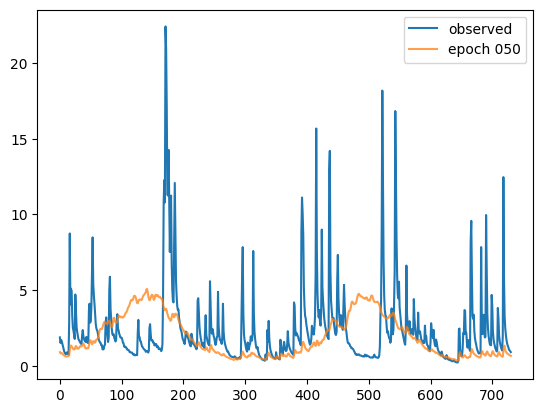

NSE: -0.178
MSE: 8.179
RMSE: 2.860
KGE: -0.019
Alpha-NSE: 0.522
Beta-KGE: 0.792
Beta-NSE: -0.190
Pearson-r: 0.125
FHV: -68.269
FMS: 38.594
FLV: 49.956
Peak-Timing: 1.500
Peak-MAPE: 87.334


In [5]:
run_dir = "runs/dev/run_0702_105351" #CHANGE IT

import pickle
import matplotlib.pyplot as plt
from neuralhydrology.evaluation import metrics

nb_epochs = 50


nb_epochs = str(nb_epochs)
nb_epochs = (3-len(nb_epochs))*'0'+nb_epochs

with open(run_dir + "/validation/model_epoch"+nb_epochs+"/validation_results.p", "rb") as fp:
    results = pickle.load(fp)
    qsim = results['01510000']['1D']['xr']['QObs(mm/d)_sim']
    qobs = results['01510000']['1D']['xr']['QObs(mm/d)_obs']

plt.plot(qobs, label='observed')
plt.plot(qsim,label="epoch "+nb_epochs, alpha = 0.75)
plt.legend()
plt.show()

metric_values = metrics.calculate_all_metrics(qobs.isel(time_step=-1),
                                              qsim.isel(time_step=-1))
for key, val in metric_values.items():
    print(f"{key}: {val:.3f}")

The poor quality of the results might be due to the structure of the Superflex model (if its structure doesn't reflect the basin from which the data are collected).

# Example 2
![example2](doc/pictures/example2.png)

## Preliminaries

In [1]:
import sys
from generate_data import generate_data
sys.path.append('..')  # Add the parent folder to the sys.path
sys.path.append('../..')  # Add the parent of the parent folder to the sys.path
from pathlib import Path
from neuralhydrology.nh_run import start_run

## Data generation
This time, let's generate a dataset so that the Superflex model structure will be similar to the structure of the model that generated the data.
The `generate_data` function takes on input the id of a basin, get the static inputs and the precipitation for this basin and simulate a Superflex network as the one depicted just above, but with only one routing reservoir and one lag function. The two others parameters of `generate_data` are the rate of the routing reservoir and the timesteps of the lag function.

In [2]:
# not needed if you got the dataset from the link above
generate_data('01510000',0.1,6)
generate_data('01516500',0.3,6)

## Learning process

In [7]:
start_run(config_file=Path("example2.yml", gpu=-1))

2024-02-07 13:59:26,826: Logging to runs\dev\run_0702_135926\output.log initialized.
2024-02-07 13:59:26,827: ### Folder structure created at runs\dev\run_0702_135926
2024-02-07 13:59:26,828: ### Run configurations for run
2024-02-07 13:59:26,829: experiment_name: None
2024-02-07 13:59:26,829: run_dir: runs\dev\run_0702_135926
2024-02-07 13:59:26,830: train_basin_file: 2_basin_list.txt
2024-02-07 13:59:26,831: validation_basin_file: 2_basin_list.txt
2024-02-07 13:59:26,832: test_basin_file: 2_basin_list.txt
2024-02-07 13:59:26,833: train_start_date: 2006-10-01 00:00:00
2024-02-07 13:59:26,834: train_end_date: 2008-09-30 00:00:00
2024-02-07 13:59:26,835: validation_start_date: 2002-10-01 00:00:00
2024-02-07 13:59:26,836: validation_end_date: 2004-09-30 00:00:00
2024-02-07 13:59:26,837: test_start_date: 1998-10-01 00:00:00
2024-02-07 13:59:26,838: test_end_date: 2000-09-30 00:00:00
2024-02-07 13:59:26,839: per_basin_train_periods_file: None
2024-02-07 13:59:26,840: per_basin_validation_p

## Evaluation

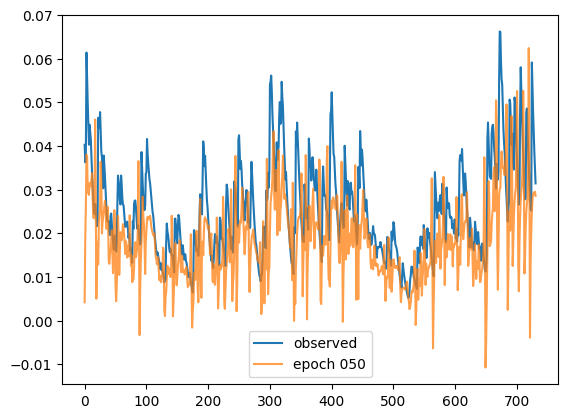

NSE: -0.066
MSE: 0.000
RMSE: 0.011
KGE: 0.505
Alpha-NSE: 0.833
Beta-KGE: 0.715
Beta-NSE: -0.652
Pearson-r: 0.632
FHV: -19.993
FMS: 3.574
FLV: -792.099
Peak-Timing: 2.167
Peak-MAPE: 52.323


In [8]:
run_dir = "runs/dev/run_0702_135926" #CHANGE IT

import pickle
import matplotlib.pyplot as plt
from neuralhydrology.evaluation import metrics

nb_epochs = 50


nb_epochs = str(nb_epochs)
nb_epochs = (3-len(nb_epochs))*'0'+nb_epochs

with open(run_dir + "/validation/model_epoch"+nb_epochs+"/validation_results.p", "rb") as fp:
    results = pickle.load(fp)
    qsim = results['01510000']['1D']['xr']['QObs(mm/d)_sim']
    qobs = results['01510000']['1D']['xr']['QObs(mm/d)_obs']

plt.plot(qobs, label='observed')
plt.plot(qsim,label="epoch "+nb_epochs, alpha = 0.75)
plt.legend()
plt.show()

metric_values = metrics.calculate_all_metrics(qobs.isel(time_step=-1),
                                              qsim.isel(time_step=-1))
for key, val in metric_values.items():
    print(f"{key}: {val:.3f}")

Seems better.